# Assignment 5. Poisson distribution
Probability and Statistics<br>
3.12.2020<br>
Andrey Verbovskiy<br>
Metropolia University of Applied Sciences   

In [1]:
# Import necessary libraries and functions
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from scipy.stats import norm


Populating the interactive namespace from numpy and matplotlib


## Problem 1

1. Generate 10,000 random numbers from *Poission distribution* having mean value of 50. Make a histogram of the values. Pay special attention to the bins parameter.
1. Calculate the mean and standard deviation values for the generated random numbers.
1. Generate 10,000 random numbers from *normal distribution* having the same mean and standard deviation as for the Poisson distribution.
1. Overlap the histograms of the generated data (Poisson and normal distribution).
1. How much do they differ? Explain why.

In [12]:
a = poisson(50,10000)
a.std()  #7.06388515690905
a.mean() #49.9821

b= normal(49.9821,7.06388515690905, 10000 )
b

array([64.79233092, 50.17734378, 51.03503656, ..., 57.45742061,
       43.3968361 , 50.10472538])

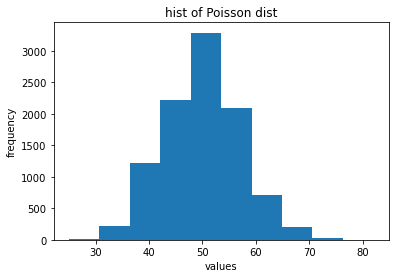

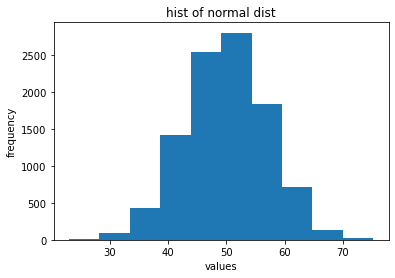

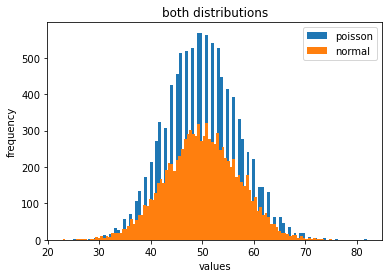

In [26]:
plt.hist(a, bins =10)
title('hist of Poisson dist')
xlabel('values')
ylabel('frequency')
plt.show()

plt.hist(b, bins =10)
title('hist of normal dist')
xlabel('values')
ylabel('frequency')
plt.show()

plt.hist(a, bins =100, label = 'poisson')
plt.hist(b, bins =100, label = 'normal')
title('both distributions')
xlabel('values')
ylabel('frequency')
legend()
plt.show()

In [29]:
#Poisson values are way frequent due to the formula differences.

## Problem 2

In this problem the aim is to simulate the functioning of a desktop image scanner. Typically the documents are scanned with 300 DPI ([dots-per-inch](https://en.wikipedia.org/wiki/Dots_per_inch)) resolution. The scanner has true color (24-bit) [color depth](https://en.wikipedia.org/wiki/Color_depth), meaning that each color has 8 bits resolution, giving 256 different shades of gray.

Imagine that you are scanning 10 pieces of 2 inch x 2 inch sized grayscale images having different average brightness. The brightness for each document is [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.10, 0.20, 0.50, 0.99] times of the full-scale shades of gray (256).

Write a code that simulates the scanning of the grayscale images having different brightness. Show the images in [one figure using subplots](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html). Calculate the mean and the standard deviation values of the brightness for each image.

Plot how the signal-to-noise ratio changes when the average brightness increases. Explain and discuss about your results.

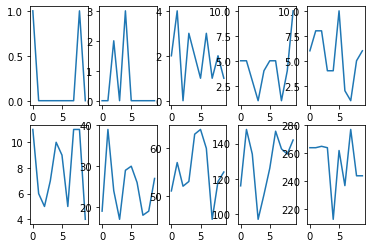

In [55]:
n = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.10, 0.20, 0.50, 0.99])

k = poisson(0.001*256, 10)
k1 = poisson(0.002*256, 10)
k2 = poisson(n[2]*256,10)
k3 = poisson(n[3]*256,10)
k4 = poisson(n[4]*256,10)
k5 = poisson(n[5]*256,10)
k6 = poisson(n[6]*256,10)
k7 = poisson(n[7]*256,10)
k8 = poisson(n[8]*256,10)
k9 = poisson(n[9]*256,10)

plt.subplot(2,5,1)
plt.plot(k)
plt.subplot(2,5,2)
plt.plot(k1)
plt.subplot(2,5,3)
plt.plot(k2)
plt.subplot(2,5,4)
plt.plot(k3)
plt.subplot(2,5,5)
plt.plot(k4)
plt.subplot(2,5,6)
plt.plot(k5)
plt.subplot(2,5,7)
plt.plot(k6)
plt.subplot(2,5,8)
plt.plot(k7)
plt.subplot(2,5,9)
plt.plot(k8)
plt.subplot(2,5,10)
plt.plot(k9)
plt.show()

In [70]:
k.mean()#0.2
k.std()#0.4000000000000001
k1.mean()#0.5
k1.std()#1.02469507659596
k2.mean()#1.9
k2.std()#1.1357816691600546
k3.mean()#4.3
k3.std()#2.41039415863879
k4.mean()#5.4
k4.std() #2.6532998322843198

print(k5.mean(), k5.std())
print(k6.mean(), k6.std())
print(k7.mean(), k7.std())
print(k8.mean(), k8.std())
print(k9.mean(), k9.std())

7.9 2.6627053911388696
24.8 6.539113089708726
55.3 5.532630477449221
129.2 15.791136754521505
253.4 17.83367600916872


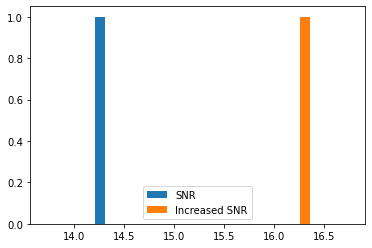

In [79]:
SNR = k9.mean()/k9.std()

SNR1 = 290/k9.std()

plt.hist(SNR, label = 'SNR')
plt.hist(SNR1, label = 'Increased SNR')
legend()
plt.show()

In [83]:
As bigger the average brightness is as more mean is. SNR formula is SNR = k9.mean()/k9.std(), 
which means that increase in mean value leads to increase in SNR final value.

SyntaxError: invalid syntax (<ipython-input-83-707c2e749dda>, line 2)

## Problem 3

Take photos of [smooth surface in dim lighting conditions](https://psmag.com/social-justice/dim-lights-dampen-emotions-72545). Use manual settings for the camera: constant sensitivity (e.g. [film speed](https://en.wikipedia.org/wiki/Film_speed#ISO), for example use ISO 800) and different [shutter speeds](https://en.wikipedia.org/wiki/Shutter_speed) to control the [exposure](https://en.wikipedia.org/wiki/Exposure_(photography)) (amount of light that reaches the camera's sensor). 

Select parts of the photos where the illumination is as smooth as possible. Convert the photos to grayscale and calculate the mean, the standard devation and the SNR-values for the selected parts.

Study does the SNR to shot noise ($SNR \approx \sqrt{N}$) rule apply also for this experiment. Explain and discuss about the results.

In [92]:
#After experiment:

data= np.array([200,220,250])
data.mean()#223.33333333333334
data.std()#20.548046676563256

SNR = data.mean()/data.std()
SNR #10.86883521576109
sqrt(223.33333333333334) #14.944341180973263

#The difference is around 4.1, which is a relatively big difference. Maybe, the quality of pictures played an essential 
#role here as it influences the shot noise

14.944341180973263